# t-критерий Стьюдента для независимых выборок

### t-критерий Стьюдента – общее название для класса методов статистической проверки гипотез (статистических критериев), основанных на распределении Стьюдента. Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках.

*Для применения t-критерия Стьюдента необходимо, чтобы исходные данные имели нормальное распределение (*). 
*Также имеет значение равенство дисперсий (распределения) сравниваемых групп (гомоскедастичность). При неравных дисперсиях применяется t-критерий в модификации Уэлча (Welch's t).*

*t-критерий «боится» выбросов, т.е. аномальных отклонений.  Выбросы в данных сильно искажают распределение t-критерия, что, в свою очередь, может привести к ошибкам статистического вывода, поэтому от аномальных наблюдений следует избавиться. Часто из выборки удаляют все значения, выходящие за пределы ±2 стандартных отклонения от средней.*

*При отсутствии нормального распределения сравниваемых выборок вместо t-критерия Стьюдента используются аналогичные методы непараметрической статистики, среди которых наиболее известными является U-критерий Манна — Уитни.*

*Примечание. выборочное среднее распределено нормально*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
import pylab
from tqdm.notebook import tqdm
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
t = pd.Series(np.random.normal(10,3,size=1000))

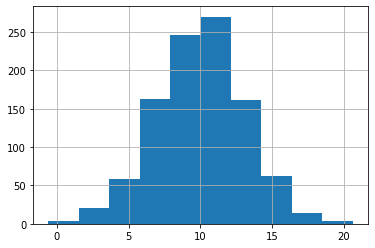

In [3]:
t.hist()

### Проверка на нормальность

In [4]:
# Тест Шапиро-Уилка
stat, p = stats.shapiro(t)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.999, p-value=0.589
Принять гипотезу о нормальности


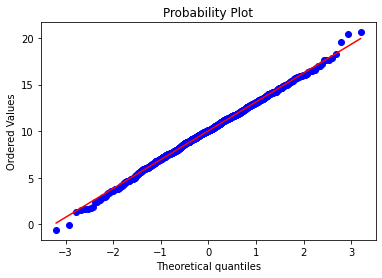

In [5]:
# Графический метод
stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

In [6]:
# Бутстрап
result = []
n = 10000
sample_size = 36
for _ in tqdm(range(n)):
  a = np.random.normal(10,3,size=sample_size)
  b = np.random.normal(10,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [7]:
t = pd.Series(result)

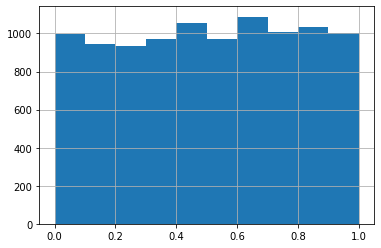

In [8]:
t.hist()

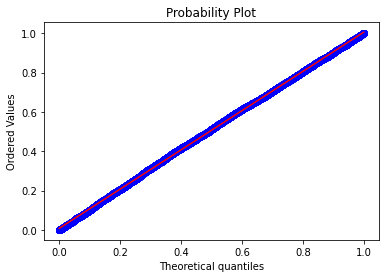

In [9]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [10]:
(t < 0.05).mean()

0.049

### Проверка гипотезы

In [11]:
baseline = 10
mde = 2
result = []
n = 10000
sample_size = 36
for _ in tqdm(range(n)):
  a = np.random.normal(baseline,3,size=sample_size)
  b = np.random.normal(baseline + mde,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [12]:
t = pd.Series(result)

In [13]:
(t < 0.05).mean()

0.7988

In [14]:
a = np.random.normal(baseline,3,size=sample_size)
b = np.random.normal(baseline + mde,3,size=sample_size)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-4.2618906244366, pvalue=6.213977116755455e-05)

### Определение размера выборки

In [15]:
sample = pd.Series(np.random.normal(10,3,size=1000))

In [16]:
es = ((baseline+mde) - baseline)/ sample.std()

In [17]:
# statsmodels.stats.power.TTestIndPower.solve_power
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

36.39986963161542